In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define dataset path
dataset_path = '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset'

In [3]:
# Import necessary libraries and define data generators
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

# Define the input size for DenseNet121
IMG_SIZE = (224, 224)
BATCH_SIZE = 256  # Adjust batch size if needed

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Use DenseNet121's preprocessing
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)

# Load and preprocess test images
test_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 13121 images belonging to 6 classes.
Found 1455 images belonging to 6 classes.
Found 1624 images belonging to 6 classes.


In [4]:
# Define fashion categories
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

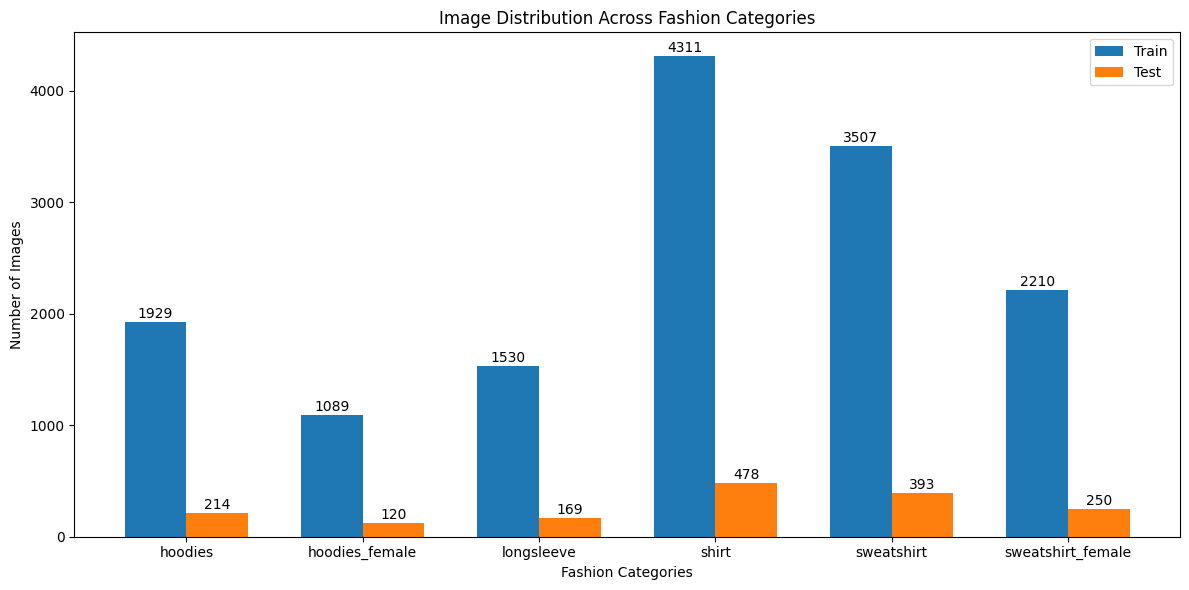

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Define your data paths
train_data_path = '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Train'
test_data_path = '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Test'

# Define your fashion categories
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

# Initialize counts for each category
train_counts = {category: 0 for category in fashion_categories}
test_counts = {category: 0 for category in fashion_categories}

# Count images in train dataset
for category in fashion_categories:
    category_path = os.path.join(train_data_path, category)
    train_counts[category] = len(os.listdir(category_path))

# Count images in test dataset
for category in fashion_categories:
    category_path = os.path.join(test_data_path, category)
    test_counts[category] = len(os.listdir(category_path))

df = pd.DataFrame({
    'Category': fashion_categories,
    'Train Count': list(train_counts.values()),
    'Test Count': list(test_counts.values())
})

# Get the positions for the bars
x = np.arange(len(fashion_categories))
width = 0.35  # Width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, df['Train Count'], width, label='Train')
rects2 = ax.bar(x + width/2, df['Test Count'], width, label='Test')

# Add labels, title, and legend
ax.set_xlabel('Fashion Categories')
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution Across Fashion Categories')
ax.set_xticks(x)
ax.set_xticklabels(fashion_categories)
ax.legend()

# Add count labels
for index, row in df.iterrows():
    ax.text(x=index - width/2, y=row['Train Count'] + 10, s=str(row['Train Count']), ha='center', va='bottom', fontsize=10)
    ax.text(x=index + width/2, y=row['Test Count'] + 10, s=str(row['Test Count']), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

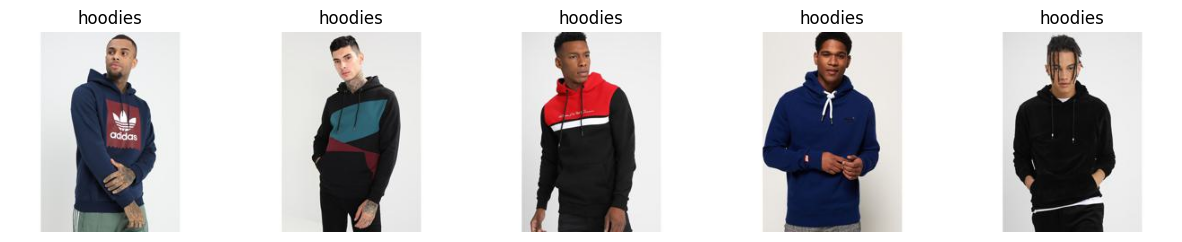

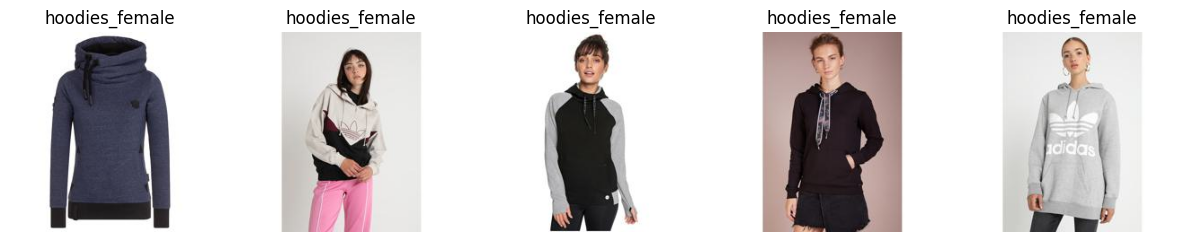

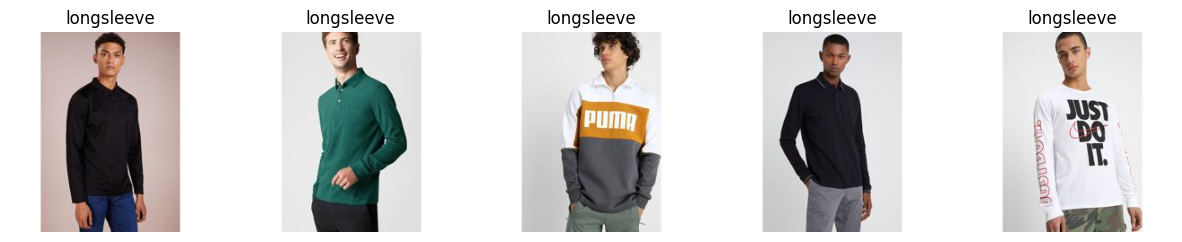

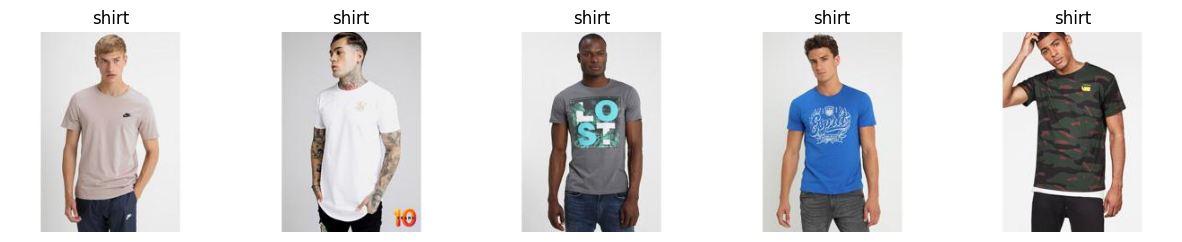

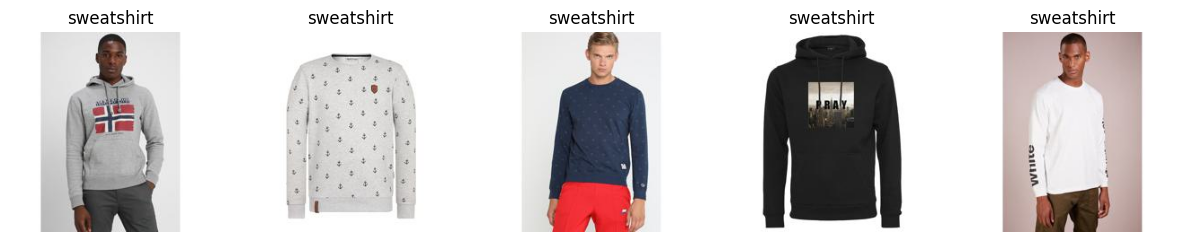

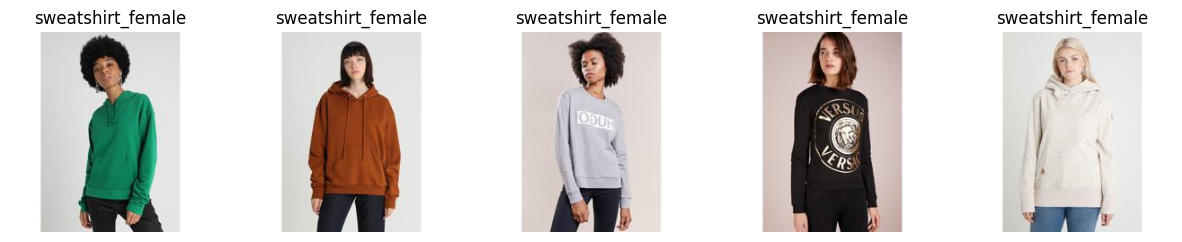

In [6]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

def plot_sample_images(img_paths, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_path in enumerate(img_paths[:num_images]):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Define your data paths and fashion categories
data_path = '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Train'
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

for category in fashion_categories:
    category_path = os.path.join(data_path, category)
    all_img_files = os.listdir(category_path)
    random_img_files = random.sample(all_img_files, 5)
    img_paths = [os.path.join(category_path, img_file) for img_file in random_img_files]
    plot_sample_images(img_paths, [category] * len(img_paths))

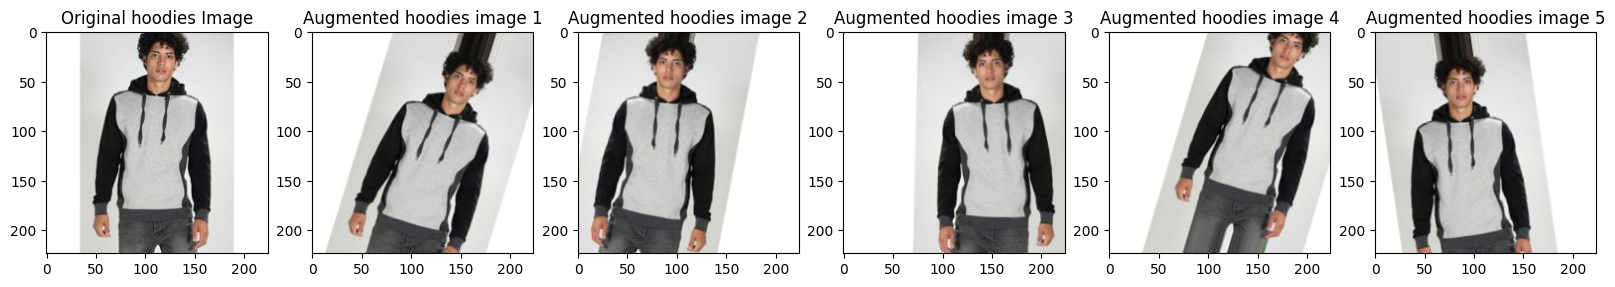

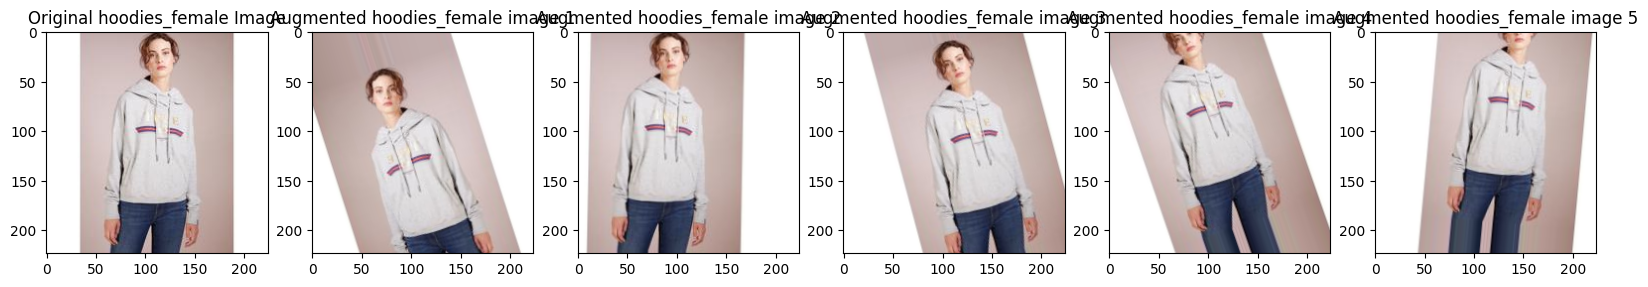

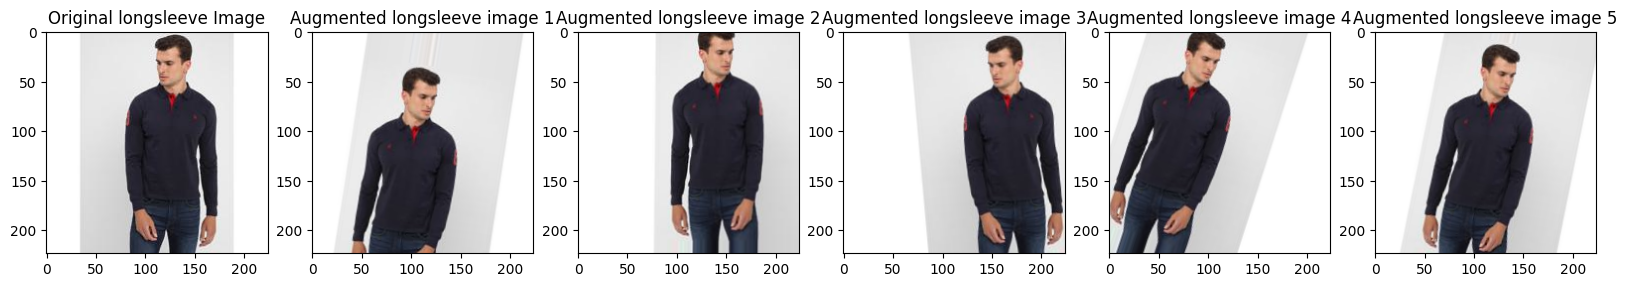

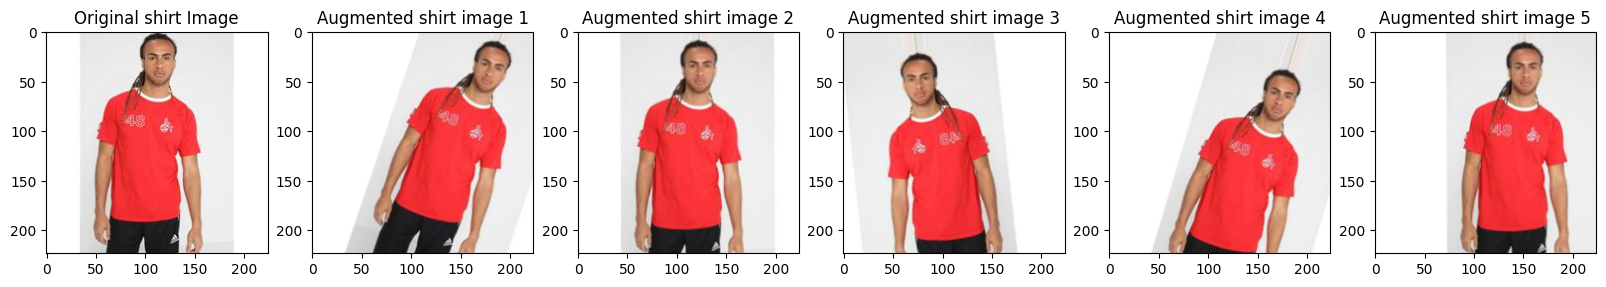

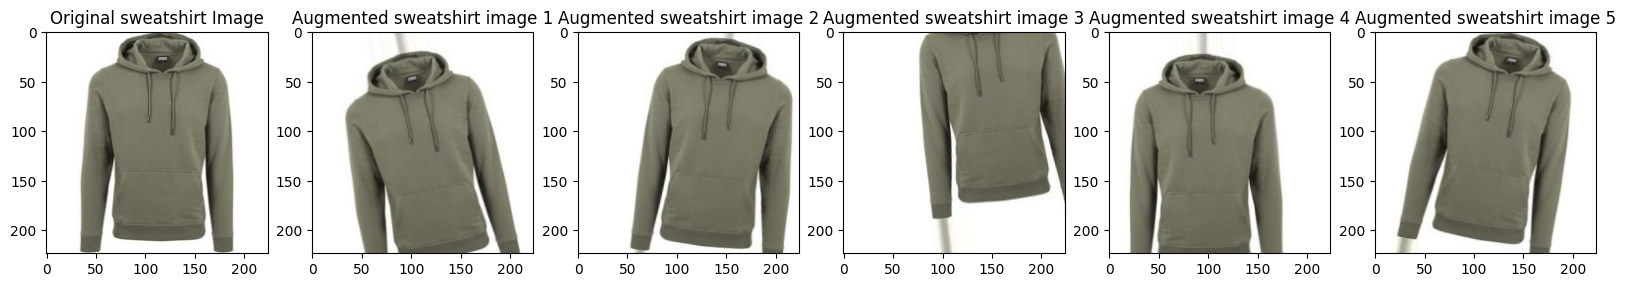

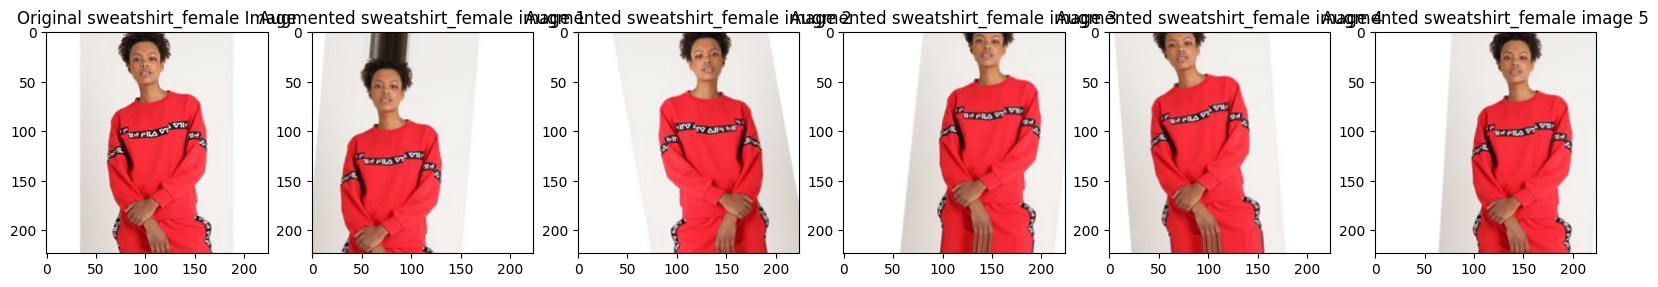

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2, # Add height shift
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'
)

# Define your data paths and emotion categories
data_path = '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Train'
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

# Loop through each emotion category and plot sample images
for category in fashion_categories:
    category_path = os.path.join(data_path, category)
    # Get one sample image from each category
    img_path = os.path.join(category_path, os.listdir(category_path)[0])

    # Load a single image and apply augmentation
    img = Image.open(img_path).resize((224, 224))
    # Convert the image to RGB if it's not already
    img = img.convert('RGB')
    img = np.array(img)
    img = img.reshape((1, 224, 224, 3))

    # Use __next__() instead of next() and get the first item from the batch
    augmented_imgs = [datagen.flow(img, batch_size=1).__next__()[0] for _ in range(5)]

    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes[0].imshow(img[0].astype('uint8'))  # Original image
    axes[0].set_title(f"Original {category} Image")

    for i, aug_img in enumerate(augmented_imgs):
        # Rescale augmented image to 0-255 and convert to uint8
        aug_img = (aug_img * 255).astype('uint8')
        axes[i + 1].imshow(aug_img)
        axes[i + 1].set_title(f"Augmented {category} image {i+1}")

    plt.show()

In [14]:
# Build and compile the DenseNet121 model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import os
import pandas as pd

# Instantiate Precision and Recall outside the function
precision = Precision()
recall = Recall()

# Custom F1-score metric
def f1_score(y_true, y_pred):
    precision_value = precision(y_true, y_pred)  # Use the instantiated objects
    recall_value = recall(y_true, y_pred)
    f1 = 2 * ((precision_value * recall_value) / (precision_value + recall_value + tf.keras.backend.epsilon()))
    return f1

# Apply mixed precision for faster training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load pre-trained DenseNet121 model without the top classification layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(6, activation='softmax')(x)  # 6 classes for Zalando Fashion Dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Calculate class weights
train_data_path = '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Train'
train_counts = {category: 0 for category in fashion_categories}

for category in fashion_categories:
    category_path = os.path.join(train_data_path, category)
    train_counts[category] = len(os.listdir(category_path))

total_samples = sum(train_counts.values())
class_weights = {i: total_samples / count for i, count in enumerate(train_counts.values())}

In [15]:
# Print model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast_2 (Cast)             │ (None, 224, 224, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_4          │ (None, 230, 230, 3)    │              0 │ cast_2[0][0]           │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_4[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_5          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_5[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat  

 Total params: 7,565,382 (28.86 MB)

 Trainable params: 527,878 (2.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [16]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,  # Adjust epochs as needed
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    class_weight=class_weights
)

Epoch 1/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - accuracy: 0.3229 - f1_score: 0.1575 - loss: 11.5036 - precision: 0.4127 - recall: 0.1637 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 1747s 34s/step - accuracy: 0.3252 - f1_score: 0.1590 - loss: 11.4541 - precision: 0.4165 - recall: 0.1655 - val_accuracy: 0.6016 - val_f1_score: 0.3738 - val_loss: 0.8876 - val_precision: 0.7678 - val_recall: 0.4055
Epoch 2/40
 1/51 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5859 - f1_score: 0.3824 - loss: 6.5745 - precision: 0.7429 - recall: 0.4062

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 598ms/step - accuracy: 0.5859 - f1_score: 0.3824 - loss: 6.5745 - precision: 0.7429 - recall: 0.4062 - val_accuracy: 0.6008 - val_f1_score: 0.3890 - val_loss: 0.8987 - val_precision: 0.7474 - val_recall: 0.3859
Epoch 3/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.5824 - f1_score: 0.4159 - loss: 6.3218 - precision: 0.7130 - recall: 0.4182 - val_accuracy: 0.6219 - val_f1_score: 0.4661 - val_loss: 0.8075 - val_precision: 0.7597 - val_recall: 0.4570
Epoch 4/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 356ms/step - accuracy: 0.6094 - f1_score: 0.4691 - loss: 5.8756 - precision: 0.7267 - recall: 0.4570 - val_accuracy: 0.6219 - val_f1_score: 0.4716 - val_loss: 0.8095 - val_precision: 0.7384 - val_recall: 0.4586
Epoch 5/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.6153 - f1_score: 0.4830 - loss: 5.7371 - precision: 0.7283 - recall: 0.4712 - val_accuracy: 0.6539 - val_f1_score: 0.5077 - val_loss: 0.7936 - val_precision: 0.7406 - val_recall: 0.5063
Epo

In [17]:
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.6434 - f1_score: 0.6213 - loss: 0.7098 - precision: 0.7006 - recall: 0.5808
Test Accuracy: 65.50%


In [18]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Use a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,  # Add more epochs for fine-tuning
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    class_weight=class_weights
)

Epoch 1/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 549s 6s/step - accuracy: 0.5638 - f1_score: 0.6205 - loss: 7.6849 - precision: 0.6549 - recall: 0.4616 - val_accuracy: 0.6289 - val_f1_score: 0.6191 - val_loss: 0.7644 - val_precision: 0.6630 - val_recall: 0.5703
Epoch 2/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 349ms/step - accuracy: 0.6523 - f1_score: 0.6191 - loss: 5.7238 - precision: 0.7263 - recall: 0.5391 - val_accuracy: 0.6187 - val_f1_score: 0.6190 - val_loss: 0.8175 - val_precision: 0.6525 - val_recall: 0.5648
Epoch 3/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.6230 - f1_score: 0.6189 - loss: 5.4891 - precision: 0.6928 - recall: 0.5362 - val_accuracy: 0.6234 - val_f1_score: 0.6191 - val_loss: 0.7961 - val_precision: 0.6630 - val_recall: 0.5656
Epoch 4/40
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 377ms/step - accuracy: 0.6250 - f1_score: 0.6191 - loss: 5.5453 - precision: 0.6887 - recall: 0.5703 - val_accuracy: 0.6203 - val_f1_score: 0.6191 - val_loss: 0.8135 - val_precision: 0.6523 - val_recall:

In [19]:
# Evaluate the fine tuned model
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.7250 - f1_score: 0.6671 - loss: 0.5354 - precision: 0.7406 - recall: 0.7058
Test Accuracy: 72.30%


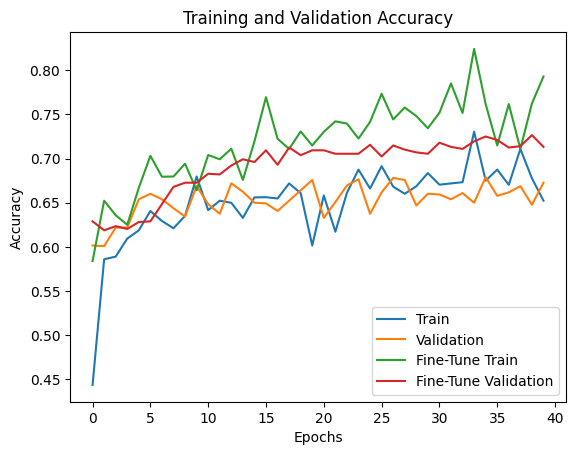

In [20]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(fine_tune_history.history['accuracy'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_accuracy'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

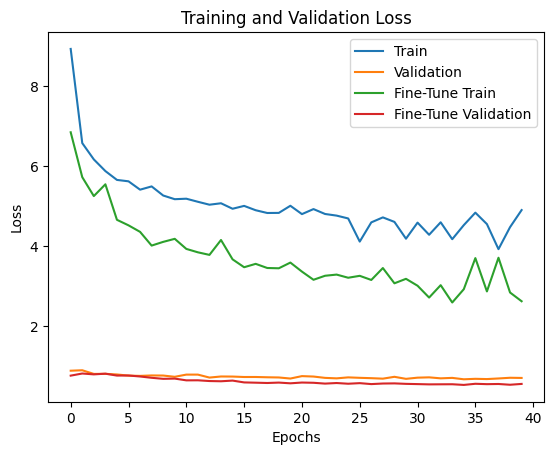

In [21]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.plot(fine_tune_history.history['loss'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_loss'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

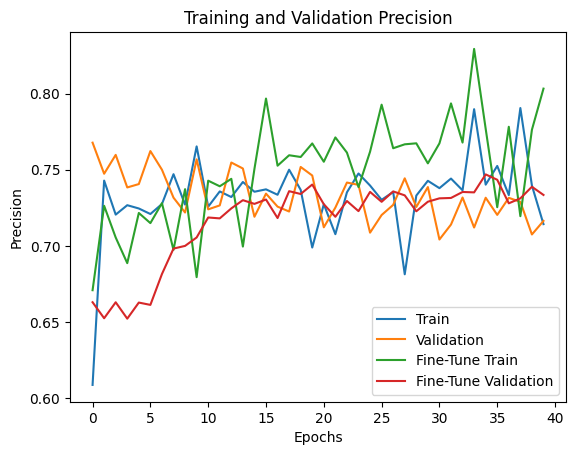

In [22]:
# Plot training & validation precision
plt.plot(history.history['precision'], label='Train')
plt.plot(history.history['val_precision'], label='Validation')
plt.plot(fine_tune_history.history['precision'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_precision'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Training and Validation Precision')
plt.show()

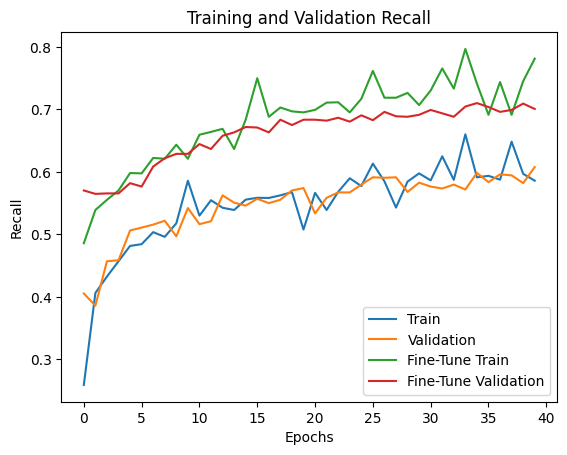

In [23]:
# Plot training & validation recall
plt.plot(history.history['recall'], label='Train')
plt.plot(history.history['val_recall'], label='Validation')
plt.plot(fine_tune_history.history['recall'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_recall'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Training and Validation Recall')
plt.show()

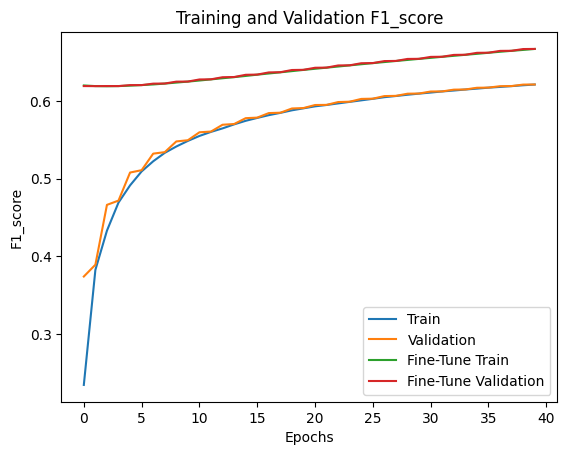

In [24]:
# Plot training & validation f1_score
plt.plot(history.history['f1_score'], label='Train')
plt.plot(history.history['val_f1_score'], label='Validation')
plt.plot(fine_tune_history.history['f1_score'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_f1_score'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('F1_score')
plt.legend()
plt.title('Training and Validation F1_score')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

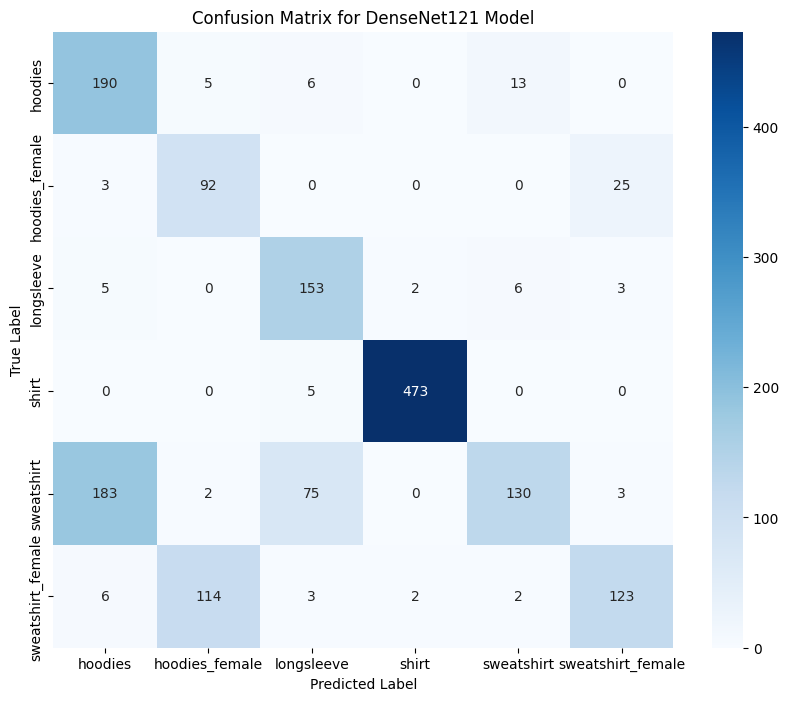

In [25]:
# Import necessary libraries
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications.densenet import preprocess_input  # Import DenseNet's preprocessing

# Define your fashion categories
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

# Predict on test data and generate confusion matrix
# Initialize empty lists to store all predicted and true categories
all_predicted_categories = []
all_true_categories = []

# Loop through each category
for category in fashion_categories:
    # Define the path to the category folder in the test dataset
    category_folder_path = os.path.join('/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Test', category)

    # Get a list of all image files in the category folder
    image_files = [f for f in os.listdir(category_folder_path) if os.path.isfile(os.path.join(category_folder_path, f))]

    # Loop through each image file and make a prediction
    for image_file in image_files:
        # Construct the full path to the image
        img_path = os.path.join(category_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # Use DenseNet's preprocessing

        # Make the prediction
        prediction = model.predict(img_array)

        # Get the predicted class index and category label
        predicted_class_index = np.argmax(prediction)
        predicted_category = fashion_categories[predicted_class_index]

        # Append the predicted and true categories to the lists
        all_predicted_categories.append(predicted_category)
        all_true_categories.append(category)  # True category is the current category

# Convert the lists to NumPy arrays
all_predicted_categories = np.array(all_predicted_categories)
all_true_categories = np.array(all_true_categories)

# Create the confusion matrix
cm_all_categories = confusion_matrix(all_true_categories, all_predicted_categories, labels=fashion_categories)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_all_categories, annot=True, fmt="d", cmap="Blues",
            xticklabels=fashion_categories, yticklabels=fashion_categories)
plt.title("Confusion Matrix for DenseNet121 Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
# Import necessary libraries
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.densenet import preprocess_input  # Import DenseNet's preprocessing

# Define your fashion categories
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

# Path to your Test folder
test_folder_path = '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Test'

# Calculate and print TP, FP, TN, FN
true_labels = []
predicted_labels = []

# Loop through each fashion category folder in the Test folder
for category_index, category in enumerate(fashion_categories):
    category_folder_path = os.path.join(test_folder_path, category)

    # Loop through images in the category folder
    for image_file in os.listdir(category_folder_path):
        img_path = os.path.join(category_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # Apply DenseNet's preprocessing

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)

        # Append labels
        true_labels.append(category_index)  # Use category_index for true label
        predicted_labels.append(predicted_class_index)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(fashion_categories)))

# Print TP, FP, TN, FN for each category
for category_index, category in enumerate(fashion_categories):
    TP = cm[category_index, category_index]
    FP = sum(cm[i, category_index] for i in range(len(fashion_categories)) if i != category_index)
    FN = sum(cm[category_index, i] for i in range(len(fashion_categories)) if i != category_index)
    TN = sum(cm[i, j] for i in range(len(fashion_categories)) for j in range(len(fashion_categories)) if i != category_index and j != category_index)

    print(f"For {category} Category:")
    print("True Positives (TP):", TP)
    print("False Positives (FP):", FP)
    print("True Negatives (TN):", TN)
    print("False Negatives (FN):", FN)
    print("-" * 20)  # Separator between categories

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

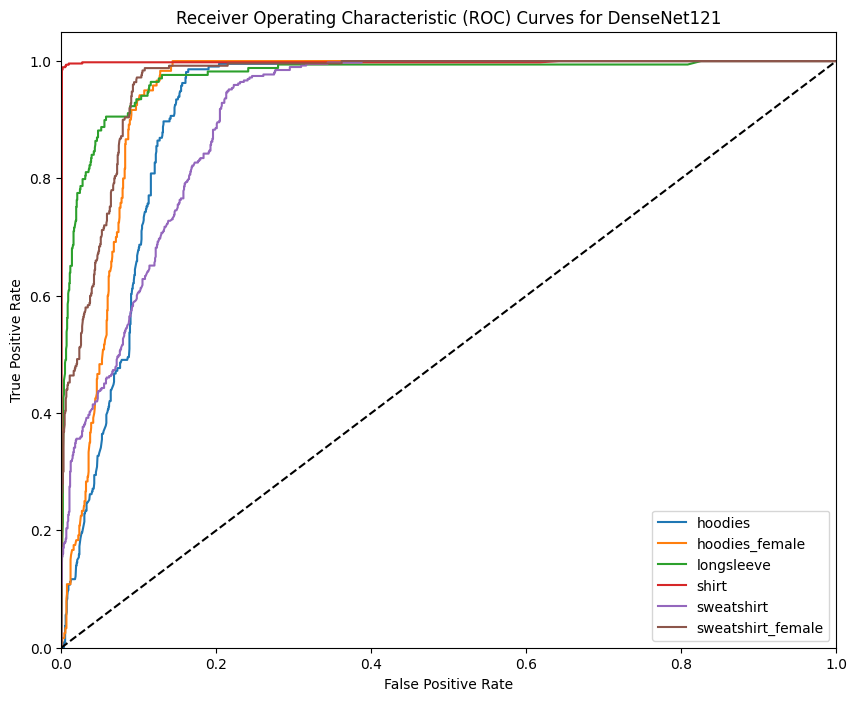

In [28]:
# Import necessary libraries
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.applications.densenet import preprocess_input  # Import DenseNet's preprocessing
import matplotlib.pyplot as plt

# Define fashion categories
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

# Path to your Test folder
test_folder_path = '/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Test'

# Plot ROC curves
# Initialize lists to store true and predicted probabilities for each class
true_labels = []
predicted_probabilities = []

# Loop through each fashion category folder in the Test folder
for category_index, category in enumerate(fashion_categories):
    category_folder_path = os.path.join(test_folder_path, category)

    # Loop through images in the category folder
    for image_file in os.listdir(category_folder_path):
        img_path = os.path.join(category_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # Apply DenseNet's preprocessing

        # Make prediction (get probabilities)
        prediction = model.predict(img_array)[0]  # Get probabilities for all classes

        # Append true label (one-hot encoded) and predicted probabilities
        true_label = np.zeros(len(fashion_categories))
        true_label[category_index] = 1  # One-hot encoding
        true_labels.append(true_label)
        predicted_probabilities.append(prediction)

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(fashion_categories)):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{fashion_categories[i]}')  # Add AUC to label

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for DenseNet121')  # Update title
plt.legend(loc="lower right")
plt.show()

In [29]:
model.save('/content/drive/My Drive/Zalando_Fashion_Project/Zalando_DenseNet121.h5')

In [30]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.2 MB/s eta 0:00:00


In [31]:
# Import necessary libraries
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.densenet import preprocess_input
import random

# Define fashion categories
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

# Define Grad-CAM function and visualize heatmaps
def grad_cam_heatmap(model, image, layer_name='conv5_block16_concat'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Loop through each fashion category
for category in fashion_categories:
    print(f"Processing category: {category}")
    category_path = os.path.join('/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Test', category)

    # Get a list of all image files in the category
    all_img_files = os.listdir(category_path)

    # Randomly select up to 3 images from the category
    num_images_to_visualize = min(3, len(all_img_files))
    random_img_files = random.sample(all_img_files, num_images_to_visualize)
    img_paths = [os.path.join(category_path, img_file) for img_file in random_img_files]

    # Loop through the randomly selected images
    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title(f"Original Image: {category}")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_category = fashion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [32]:
# Import necessary libraries
from tf_keras_vis.gradcam import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.densenet import preprocess_input  # Import DenseNet's preprocessing
import random

# Define fashion categories
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

# Define Grad-CAM++ function and visualize heatmaps
def grad_cam_plusplus_heatmap(model, image, layer_name='conv5_block16_concat'):  # Change layer name for DenseNet
    gradcam_plusplus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plusplus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Loop through each fashion category
for category in fashion_categories:
    print(f"Processing category: {category}")
    category_path = os.path.join('/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Test', category)

    # Get a list of all image files in the category
    all_img_files = os.listdir(category_path)

    # Randomly select up to 3 images from the category
    num_images_to_visualize = min(3, len(all_img_files))
    random_img_files = random.sample(all_img_files, num_images_to_visualize)
    img_paths = [os.path.join(category_path, img_file) for img_file in random_img_files]

    # Loop through the randomly selected images
    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Apply DenseNet's preprocessing

        heatmap = grad_cam_plusplus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title(f"Original Image: {category}")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_category = fashion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [33]:
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.densenet import preprocess_input
import random

# Define fashion categories
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

# Define Score-CAM function and visualize heatmaps
def scorecam_heatmap(model, image, layer_name=None):
    scorecam = Scorecam(model)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    # Dynamic layer selection (if layer_name is not provided, use the last convolutional layer)
    if layer_name is None:
        for layer in reversed(model.layers):
            if 'conv' in layer.name:  # Check for convolutional layers
                layer_name = layer.name
                break  # Use the last convolutional layer found

    cam = scorecam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Loop through each fashion category
for category in fashion_categories:
    print(f"Processing category: {category}")
    category_path = os.path.join('/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Test', category)

    # Get a list of all image files in the category
    all_img_files = os.listdir(category_path)

    # Randomly select up to 3 images from the category
    num_images_to_visualize = min(3, len(all_img_files))
    random_img_files = random.sample(all_img_files, num_images_to_visualize)
    img_paths = [os.path.join(category_path, img_file) for img_file in random_img_files]

    # Loop through the randomly selected images
    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = scorecam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title(f"Original Image: {category}")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_category = fashion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [34]:
!pip install --upgrade tf-keras-vis # Install/upgrade tf-keras-vis

from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.densenet import preprocess_input
import random

# Define fashion categories
fashion_categories = ['hoodies', 'hoodies_female', 'longsleeve', 'shirt', 'sweatshirt', 'sweatshirt_female']

# Define Score-CAM function and visualize heatmaps
def scorecam_heatmap(model, image, layer_name='conv5_block16_concat'):  # Specify layer name
    scorecam = Scorecam(model)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = scorecam(loss, image, penultimate_layer=layer_name)  # Use the specified layer
    cam = normalize(cam)
    return cam

# Loop through each fashion category
for category in fashion_categories:
    print(f"Processing category: {category}")
    category_path = os.path.join('/content/drive/My Drive/Zalando_Fashion_Project/Zalando_Fashion_Dataset/Test', category)

    # Get a list of all image files in the category
    all_img_files = os.listdir(category_path)

    # Randomly select up to 3 images from the category
    num_images_to_visualize = min(3, len(all_img_files))
    random_img_files = random.sample(all_img_files, num_images_to_visualize)
    img_paths = [os.path.join(category_path, img_file) for img_file in random_img_files]

    # Loop through the randomly selected images
    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = scorecam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title(f"Original Image: {category}")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_category = fashion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.